# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


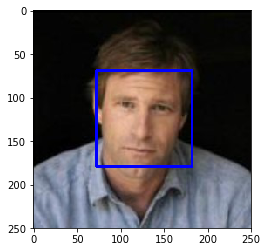

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

act_human, act_dog = 0, 0
for i in range(100):
    act_human += face_detector(human_files_short[i])
    act_dog += face_detector(dog_files_short[i])
print('Percentage of human faces where face_detector actually detected a human face: {0}%'.format(act_human))
print('Percentage of doggies where face_detector incorrectly detected a human face: {0}%'.format(act_dog))
    

Percentage of human faces where face_detector actually detected a human face: 96%
Percentage of doggies where face_detector incorrectly detected a human face: 17%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

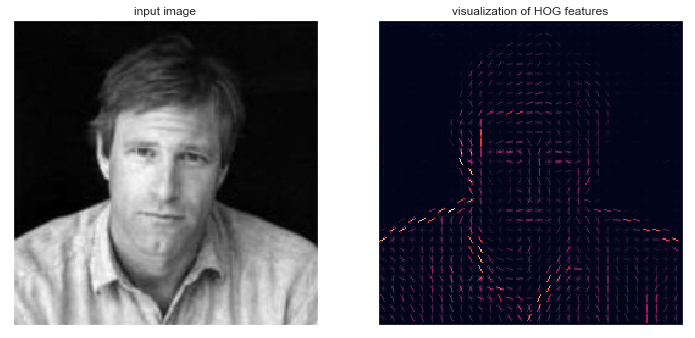

In [5]:
### (Optional)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

from skimage import data, color, feature, transform
from itertools import chain
from skimage import transform
from sklearn.datasets import fetch_lfw_people
from sklearn.feature_extraction.image import PatchExtractor
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
#from sklearn import metrics

# Process the data using the histogram of gradients (HOG) and then use SVM to classify an image as a human face.
# This closely follows an example from the book 'Python Data Science Handbook':
# https://jakevdp.github.io/PythonDataScienceHandbook/05.14-image-features.html

# First, a visualization for one of the face images:
img_picked = cv2.imread(human_files_short[0])
test_face_image = color.rgb2gray(img_picked)
hog_vec, hog_vis = feature.hog(test_face_image, visualise=True, block_norm='L2-Hys')

fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(xticks=[], yticks=[]))

ax[0].imshow(test_face_image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features')

In [6]:
# Extract patches from images (probably not necessary since there's only one face per image in the data being used):
def extract_patches(img, N, patch_size, scale=1.0):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size, max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size, mode='constant') for patch in patches])
    return patches

# Create a sliding window for images:
def sliding_window(img, patch_size, istep=2, jstep=2, scale=1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size, mode='constant')
            yield (i, j), patch

# Used to process images for prediction:
def proc_img(pth, positive_patches):
    img = color.rgb2gray(cv2.imread(pth))
    img = transform.rescale(img, 0.5, mode='constant')
    
    indices, patches = zip(*sliding_window(img, positive_patches[0].shape))
    return np.array([feature.hog(patch, block_norm='L2-Hys') for patch in patches]) 
    
# Fit an SVM model to used for prediction:
def train_another_face_detector(dog_images):
    
    # Use the face images included in skimage for training:
    positive_patches = fetch_lfw_people().images
    print('There are {0} face images coming from skimage used for training'.format(positive_patches.shape[0]))
    
    #Sadly, skimage doesn't have a corpus of dog images, so i sampled some from the larger dog dataset:
    random_dogs = np.random.choice(dog_images, 3000)
    other_images = [color.rgb2gray(cv2.resize(cv2.imread(name), (128, 128))) for name in random_dogs]
    
    # Create patches from the dog images sampled:
    not_a_face = np.vstack([extract_patches(im, 10, positive_patches[0].shape, scale) for im in other_images for scale in [0.5, 1.0, 2.0]])
    print('There are {0} non-face images coming from skimage used for training'.format(not_a_face.shape[0]))
    
    # Create training data:
    X_train = np.array([feature.hog(im, block_norm='L2-Hys') for im in chain(positive_patches, not_a_face)])
    y_train = np.zeros(X_train.shape[0])
    y_train[:positive_patches.shape[0]] = 1
    X_train.shape
    
    # Find a 'good' value for SVM c parameter using grid-search:
    grid = GridSearchCV(LinearSVC(), {'C': [0.5, 1.0, 1.5, 2.0]})
    grid.fit(X_train, y_train)
    
    model = grid.best_estimator_
    return model.fit(X_train, y_train), positive_patches

def another_face_detector(img_path, model, positive_patches):
    hog = proc_img(img_path, positive_patches)
    return model.predict(hog).sum() > 0

# Fit the SVM model to the training data:
model, positive_patches = train_another_face_detector(dog_files[100:])

There are 13233 face images coming from skimage used for training
There are 90000 non-face images coming from skimage used for training


In [7]:
act_human, act_dog = 0, 0
for i in range(100):
    act_human += another_face_detector(human_files_short[i], model, positive_patches)
    act_dog += another_face_detector(dog_files_short[0], model, positive_patches)

print('Percentage of human faces where face_detector actually detected a human face: {0}%'.format(act_human))
print('Percentage of doggies where face_detector incorrectly detected a human face: {0}%'.format(act_dog))

Percentage of human faces where face_detector actually detected a human face: 98%
Percentage of doggies where face_detector incorrectly detected a human face: 0%


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [8]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [9]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''

    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = Image.open(img_path)
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    preprocess = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), transforms.ToTensor(), normalize])
    img_p = preprocess(img)
    img_p.unsqueeze_(0)
    
    if use_cuda:
        output_hist = VGG16(img_p.to('cuda'))
        return output_hist.argmax() # predicted class index
    output_hist = VGG16(img_p)
    return output_hist.detach().numpy().argmax() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [10]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    index = VGG16_predict(img_path)
    if index in list(range(151,269)):
        return True
    return False # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [11]:
act_human_nn, act_dog_nn = 0, 0
for i in range(len(human_files_short)):
    if dog_detector(human_files_short[i]): act_human_nn += 1
    if dog_detector(dog_files_short[i]): act_dog_nn += 1
print('Percentage of humans incorrectly identified as dogs: {0}%'.format(act_human_nn))
print('Percentage of doggies correctly identified as dogs: {0}%'.format(act_dog_nn))

Percentage of humans incorrectly identified as dogs: 0%
Percentage of doggies correctly identified as dogs: 93%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [12]:
### (Optional) 
alexnet_model = models.alexnet(pretrained=True)
def alexnet_predict(img_path):
    img = Image.open(img_path)
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    preprocess = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), transforms.ToTensor(), normalize])
    img_p = preprocess(img)
    img_p.unsqueeze_(0)
    #print(img_p.size())
    output_hist = alexnet_model(img_p)
    
    return output_hist.detach().numpy().argmax()

def dog_detector_alexnet(img_path):
    index = alexnet_predict(img_path)
    if index in list(range(151, 269)):
        return True
    return False

act_human_inc, act_dog_inc = 0, 0
for i in range(len(human_files_short)):
    #print(i)
    if dog_detector_alexnet(human_files_short[i]): act_human_inc += 1
    if dog_detector_alexnet(dog_files_short[i]): act_dog_inc += 1
print('Percentage of humans incorrectly identified as dogs by alexnet: {0}%'.format(act_human_inc))
print('Percentage of doggies correctly identified as dogs by alexnet: {0}%'.format(act_dog_inc))

Percentage of humans incorrectly identified as dogs by alexnet: 1%
Percentage of doggies correctly identified as dogs by alexnet: 96%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [13]:
import torch
import torchvision.models as models
from PIL import Image
import torchvision.transforms as transforms
use_cuda = torch.cuda.is_available()

In [14]:
import os
#from torchvision import datasets
import torchvision

batch_size = 20

# Basically ended up using the same resize and cropping transforms found in the imagenet code:
# https://github.com/pytorch/examples/blob/master/imagenet/main.py#L122

trans_tr = transforms.Compose([transforms.RandomResizedCrop(224),
                            transforms.RandomHorizontalFlip(),
                            torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

trans_va = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224),
                            transforms.RandomHorizontalFlip(),
                            torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

trans_te = transforms.Compose([transforms.Resize(size=(224,224)),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

# Data locations:
doggie_train = torchvision.datasets.ImageFolder(r'.\dogImages\train', transform=trans_tr)
doggie_valid = torchvision.datasets.ImageFolder(r'.\dogImages\valid', transform=trans_va)
doggie_test = torchvision.datasets.ImageFolder(r'.\dogImages\test', transform=trans_te)


# Data loaders:
loaders_scratch = {'train': torch.utils.data.DataLoader(doggie_train, batch_size=batch_size, shuffle=True),
                  'valid': torch.utils.data.DataLoader(doggie_valid, batch_size=batch_size, shuffle=False),
                  'test': torch.utils.data.DataLoader(doggie_test, batch_size=batch_size, shuffle=False)}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

- Larger image resizing caused my GPU to fail, so I chose to go with the image size of 244. Mostly this is because it's the same size as the inputs for the inception model. I also tested models with resizing of 64 and 128, but the results were terrible. For the validation data, I chose to resize the image to 256 and then perform center cropping to 224. Again, I got the idea from the code for the inception model, and the results were better with it.
- I chose to perform random horizonal flipping as well as color jittering, since models with these augmentations performed better than models without them. I also tried vertical flipping and random rotation, but the results suffered.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [15]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)

        self.fc1 = nn.Linear(64*56*56, 500)
        self.fc2 = nn.Linear(500, 133)
        
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=0.25)
    
    def forward(self, x):
        ## Define forward behavior        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        x = x.view(-1, 64*56*56)
        x = self.fc1(x)
        x = self.dropout(F.relu(self.fc2(x)))
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
I started with a single convolutional layer with 16 filters that was then flattened and passed to a linear feature content layer that dumped the 133 categories. From there I began increasing the number of filters to 32 and 64 for the first layer as well as adding additional convolutional layers, each using twics as many filters as the previous layer. For each model tested the accuary of the results on the test set were compared. The constraints of my GPU played a role, and after about 4 convolutional layers the model was producing a CUDA out of memory error. Also, since processing was taking so long I used 20 epochs to compare models. I also tried adding more feature content layers to see if they helped. Having two feature content layer proved best, with additional layers no producing much more gain. Once a good number of convolutional layers and feature layers were selected I started applying different pooling sizes and dropout levels to see if the results improved. In the end it seemed like two convolutional layers with 32 filters for the first layer and 64 filters for the second layer produced fair results. Along with two linear feature content layers: the first with 500 nodes and the second with the 133 dog breeds. Some larger models did produce better results, one with four convolutional layers and two feature content layers had better results, but the gains weren't much, so I chose to go with the smaller more parsimonious model.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [16]:
import torch.optim as optim

criterion_scratch = nn.CrossEntropyLoss()

optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [17]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            # train_loss += loss.item() * data.size(0)
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            # valid_loss += loss.item() * data.size(0)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(75, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.887164 	Validation Loss: 4.857231
Validation loss decreased (inf --> 4.857231). Saving model ...
Epoch: 2 	Training Loss: 4.846636 	Validation Loss: 4.785410
Validation loss decreased (4.857231 --> 4.785410). Saving model ...
Epoch: 3 	Training Loss: 4.795237 	Validation Loss: 4.736760
Validation loss decreased (4.785410 --> 4.736760). Saving model ...
Epoch: 4 	Training Loss: 4.774370 	Validation Loss: 4.696494
Validation loss decreased (4.736760 --> 4.696494). Saving model ...
Epoch: 5 	Training Loss: 4.730235 	Validation Loss: 4.630539
Validation loss decreased (4.696494 --> 4.630539). Saving model ...
Epoch: 6 	Training Loss: 4.693802 	Validation Loss: 4.599739
Validation loss decreased (4.630539 --> 4.599739). Saving model ...
Epoch: 7 	Training Loss: 4.652475 	Validation Loss: 4.533032
Validation loss decreased (4.599739 --> 4.533032). Saving model ...
Epoch: 8 	Training Loss: 4.610571 	Validation Loss: 4.525375
Validation loss decreased (4.533032 --> 4

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [18]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.863325


Test Accuracy: 15% (130/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [19]:
trans_tr = transforms.Compose([transforms.RandomResizedCrop(224),
                            transforms.RandomHorizontalFlip(),
                            torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

trans_va = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224),
                            transforms.RandomHorizontalFlip(),
                            torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

trans_te = transforms.Compose([transforms.Resize(size=(224,224)),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

# Data locations:
doggie_train = torchvision.datasets.ImageFolder(r'.\dogImages\train', transform=trans_tr)
doggie_valid = torchvision.datasets.ImageFolder(r'.\dogImages\valid', transform=trans_va)
doggie_test = torchvision.datasets.ImageFolder(r'.\dogImages\test', transform=trans_te)


# Data loaders:
loaders_transfer = {'train': torch.utils.data.DataLoader(doggie_train, batch_size=batch_size, shuffle=True),
                    'valid': torch.utils.data.DataLoader(doggie_valid, batch_size=batch_size, shuffle=False),
                    'test': torch.utils.data.DataLoader(doggie_test, batch_size=batch_size, shuffle=False)}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [20]:
import torchvision.models as models
import torch.nn as nn

# Load a pretrained model:
model_transfer = models.squeezenet1_0(pretrained=True)

# Freeze weights:
for param in model_transfer.parameters():
    param.requires_grad = False

# Change the last layer to fit breed classification:
my_classifier = list(model_transfer.classifier)
my_classifier.append(nn.Linear(1000, 133))
model_transfer.classifier = nn.Sequential(*my_classifier)

model_transfer.classifier = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Conv2d(512, 133, kernel_size=1),
    nn.ReLU(inplace=True),
    nn.AvgPool2d(13)
)
# Fixes a runtime shape error:
model_transfer.forward = lambda x: model_transfer.classifier(model_transfer.features(x)).view(x.size(0), 133)

# Allow update of weights on the classification layer:
for param in model_transfer.classifier.parameters():
    param.requires_grad = True

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I decided to use the squeezenet model since it's able to produce results similar to alexnet, but with [50x fewer parameters]( https://arxiv.org/abs/1602.07360). This model was originally created by training on the ImageNet competition data, so using it to identify dog breeds for our problem is a natural fit. I replaced the last layer with a similar layer, but one that produces the appropriate number of categories for the dog breeds. I also froze the weights for all layers except the last. I did try to run the model without freezing any weights to see how much things would be different, and after 100 epochs the accuracy on the test set was only 20%. For the data loaders I started with the loaders used in part 4, and again tried using rotation and vertical flip augmentations, keeping the learning rate for SGD to 0.01, but just like in part 4 these augmentations didn't help the accuracy of the testing data. After trying different image augmentations, I tested out a few different values for the learning rate, such as, 0.07, 0.1, 0.15, and 0.2. In the end the learning rate of 0.2 produced better accuracy on the testing data with only 25 epochs.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [21]:
criterion_transfer = nn.CrossEntropyLoss()

optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.02)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [22]:
n_epochs = 25

# train the model
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 3.949947 	Validation Loss: 2.653397
Validation loss decreased (inf --> 2.653397). Saving model ...
Epoch: 2 	Training Loss: 2.716142 	Validation Loss: 1.882930
Validation loss decreased (2.653397 --> 1.882930). Saving model ...
Epoch: 3 	Training Loss: 2.299908 	Validation Loss: 1.645898
Validation loss decreased (1.882930 --> 1.645898). Saving model ...
Epoch: 4 	Training Loss: 2.038834 	Validation Loss: 1.638566
Validation loss decreased (1.645898 --> 1.638566). Saving model ...
Epoch: 5 	Training Loss: 1.859289 	Validation Loss: 1.367879
Validation loss decreased (1.638566 --> 1.367879). Saving model ...
Epoch: 6 	Training Loss: 1.784764 	Validation Loss: 1.478083
Epoch: 7 	Training Loss: 1.743449 	Validation Loss: 1.307634
Validation loss decreased (1.367879 --> 1.307634). Saving model ...
Epoch: 8 	Training Loss: 1.631111 	Validation Loss: 1.329876
Epoch: 9 	Training Loss: 1.623364 	Validation Loss: 1.298732
Validation loss decreased (1.307634 --> 1.298732

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [23]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.357973


Test Accuracy: 67% (566/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [24]:
# list of class names by index, i.e. a name can be accessed like class_names[0]
# class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]  # code given didn't work, but this did:
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path)
    preprocess = transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    img_p = preprocess(img)
    img_p.unsqueeze_(0)
    
    if use_cuda:
        output_hist = model_transfer(img_p.to('cuda'))
        return class_names[output_hist.argmax()] # predicted class index
    output_hist = VGG16(img_p)
    return class_names[output_hist.detach().numpy().argmax()] # predicted class index

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [25]:
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if face_detector(img_path):
        print('Hi human!')
        display_img(img_path)
        dog_pred = predict_breed_transfer(img_path)
        print('You resemble a ...\n{0}\n'.format(dog_pred))
    elif dog_detector(img_path):
        print('Oh hai doggie!')
        display_img(img_path)
        dog_pred = predict_breed_transfer(img_path)
        print('You must be a ...\n{0}\n'.format(dog_pred))
    else:
        print('A dog or a face was not detected...')

def display_img(img_path):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__
I tried pictures of myself, my friends, and other dog photos (all not shown) and the results seem to be okay, of course there's always room for improvment. The types of breeds the networks thinks the humans are seems a little off though. Some improvements that could be made:
- A natural answer would be more images. Many were used here, but increasing the sample size would definitely help, especially if the images were high resolutions. Also the angles the pictures were taken, the position the dogs are standing/laying all make a difference.
- The models used above were all simple sequential models, maybe a more complex model would give better performance. Something combining the strengths of several different models (ensemble modeling) might work.
- A better strategy for parameter searching might also help. I only tried using a few different learning rates, augmentation procedures, batch sizes, and loss functions, but a more detailed grid search might help.

Hi human!


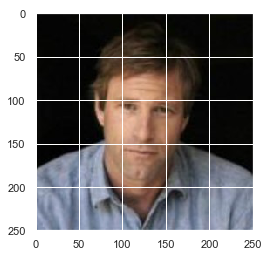

You resemble a ...
Bearded collie

Hi human!


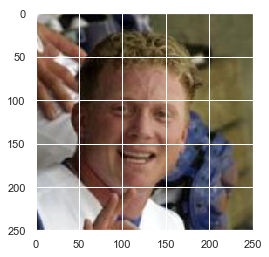

You resemble a ...
American water spaniel

A dog or a face was not detected...
Hi human!


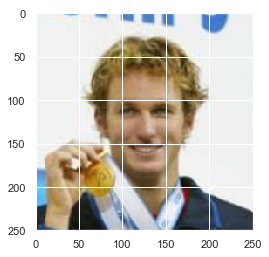

You resemble a ...
American water spaniel

Hi human!


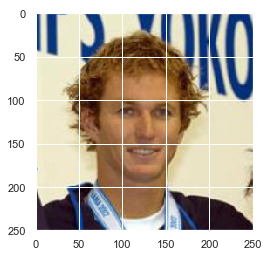

You resemble a ...
American water spaniel

Hi human!


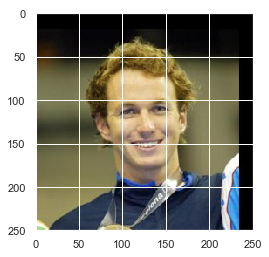

You resemble a ...
American foxhound

Hi human!


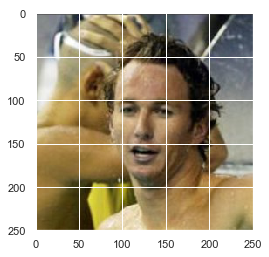

You resemble a ...
Chinese shar-pei

Hi human!


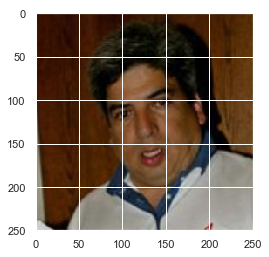

You resemble a ...
American foxhound

Hi human!


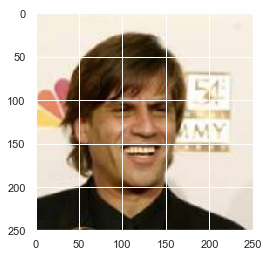

You resemble a ...
Anatolian shepherd dog

Hi human!


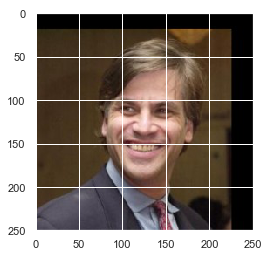

You resemble a ...
Chihuahua

Oh hai doggie!


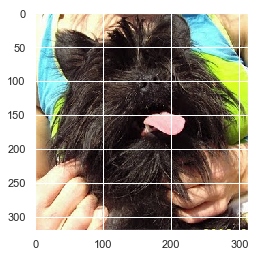

You must be a ...
German wirehaired pointer

Oh hai doggie!


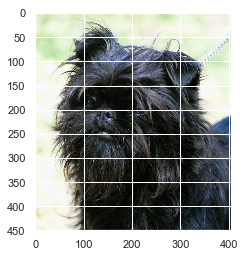

You must be a ...
Affenpinscher

Oh hai doggie!


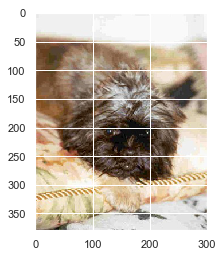

You must be a ...
Brussels griffon

Oh hai doggie!


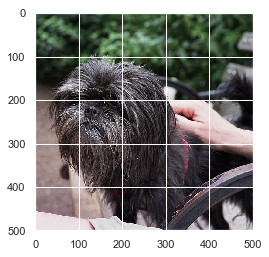

You must be a ...
Affenpinscher

Oh hai doggie!


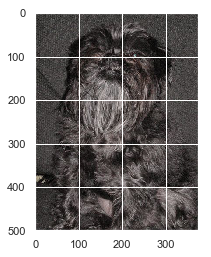

You must be a ...
Affenpinscher

Oh hai doggie!


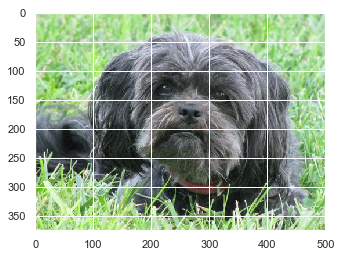

You must be a ...
Lhasa apso

Oh hai doggie!


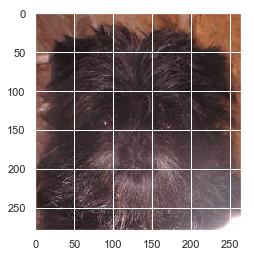

You must be a ...
Affenpinscher

Oh hai doggie!


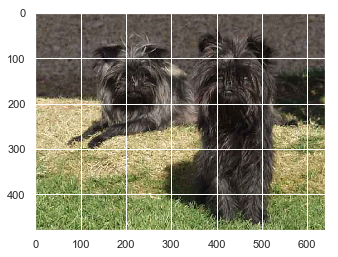

You must be a ...
Affenpinscher

Oh hai doggie!


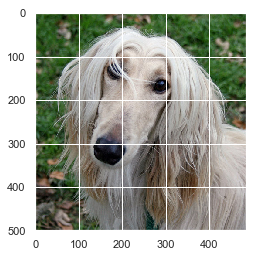

You must be a ...
Afghan hound

Oh hai doggie!


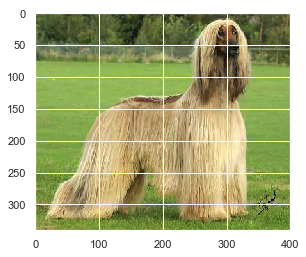

You must be a ...
Afghan hound



In [26]:
## suggested code, below
for file in np.hstack((human_files[:10], dog_files[:10])):
    run_app(file)